<h2 style = "color:Brown" > Credit EDA Assignment:<h2/>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

##### Application Data:

##### Objective:

- *The main objective of this EDA is to find what are the driving factors which resulting in customer/client defaulting the loan.*

- *Assumptions:*
    - *Customers having less income likely to default more.*
    - *Customers whose age is less than 20 are more likely to default as they don't have income.*
    - *Customers who have less credit scores are more likely default the loan.*
    - *Blue collar workers are more likely to default the loan.*

##### Loading the data:

In [2]:
#Reading the application_data csv file
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### Understanding the structure of the data:

In [3]:
# Checking the shape of the data
df.shape

(307511, 122)

*Observation*:
- *From above, we can observe that there are 307511 loan applications in this data frame*

In [4]:
# checking the dtypes and information of the data frame
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
# checking the summary of the numerical columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# checking if there are any duplicates in the data
df.duplicated().sum()

0

- *Observation:*

    - *From above, we can see that there are no duplicates in the dataset*

In [7]:
# fetching the count of missing values
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# fetching the missing values percentage in each column
miss_value_per = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
miss_value_per

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [9]:
drop_miss_value = list(miss_value_per[miss_value_per > 45].index)
drop_miss_value

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

##### Data Cleaning:

- *In the given dataset, the age,days_employed,days_registration,days_id_publish of the client is showing as negative value. Since these values can't be negative changing the values to positive before proceeding further analysis*

##### Handling Errors In The Data For Below Columns:

In [10]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x:abs(x))
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x:abs(x))
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x:abs(x))
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x:abs(x))

In [11]:
# Adding a new column name age for the given dataset
df['AGE'] = df['DAYS_BIRTH'].apply(lambda x:round(abs(x)/365))

In [12]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

##### Missing Value Treatment:

- *Missing values are imputed in different ways for numerical column and categorical column.*

- *For numerical column: we can impute with "MEAN" if there are no outliers in the column or we can impute with "MEDIAN" if there are outliers in the column*

- *For categorical column: we can impute with "MODE"*

In [13]:
#dropping the columns which have missing value % more than 45
df.drop(labels=drop_miss_value,axis=1,inplace=True)

In [14]:
# checking the shape of the data frame after dropping the columns
df.shape

(307511, 74)

In [15]:
# checking the missing value percentage for the remaining columns
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
SK_ID_CURR      

##### Observation: 

- *From above we can see that all the missing values are less than 45%*
- *Also we can see that occupation type has highest missing value of 31.34%.*
- *Since occupation type is important attribute to decide if the applicant likely to default or not we need to impute the missing values.*


In [16]:
df['OCCUPATION_TYPE'].isnull().sum()

96391

In [17]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

##### Observation:
- *By Checking the composition of occupation type we can see that there are more Laborers with 26%*
- *In general, we can impute the categorical column by using "MODE" however since the laborers are higher in composition if we impute with mode, it will skew our analysis. Hence we can create another category as "Unknown" to avoid inaccurate analysis.*

In [18]:
df['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [19]:
# checking if there any null value after imputing
df['OCCUPATION_TYPE'].isnull().sum()

0

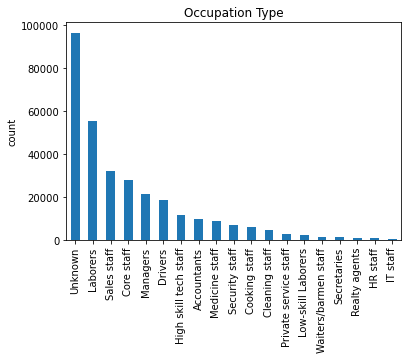

In [20]:
df['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.title('Occupation Type')
plt.ylabel('count')
plt.show()

In [21]:
miss_value_per[miss_value_per < 13]

NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
CNT_CHILDREN                   0.000000
FLAG_DOCUMENT_8                0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000


<h4 style = color:Brown > Analysis Of EXT_SOURCE_2 column to impute missing values: </h4>

In [22]:
df['EXT_SOURCE_2'].dtype

dtype('float64')

- *From above we can see that EXT_SOURCE_2 column is a continuous column.* 
- *CHECKING FOR OUTLIERS TO IMPUTE THE MISSING VALUES EITHER WITH MEAN OR MEDIAN*

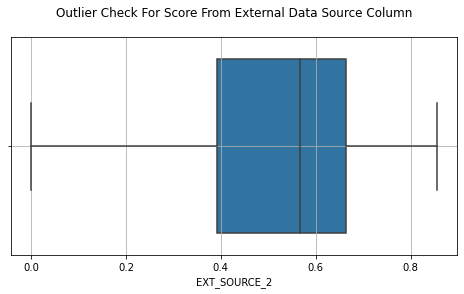

In [23]:
plt.figure(figsize=[8,4])
sns.boxplot(df['EXT_SOURCE_2'])
plt.grid()
plt.title('Outlier Check For Score From External Data Source Column\n')
plt.show()

In [24]:
df['EXT_SOURCE_2'].quantile([0.25,0.5,0.75,0.85,0.95,0.99,1])

0.25    0.392457
0.50    0.565961
0.75    0.663617
0.85    0.700728
0.95    0.747734
0.99    0.782793
1.00    0.855000
Name: EXT_SOURCE_2, dtype: float64

##### Observation:

- *From above box plot and summary statistics we can see that there are no of outliers in EXT_SOURCE_2 column. Hence imputing the missing values with mean*

In [25]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(),inplace=True)

In [26]:
# missing value check after imputing the column with mean
df['EXT_SOURCE_2'].isnull().sum()

0

<h4 style = color:Brown > Analysis Of AMT_ANNUITY column to impute missing values: </h4>

In [27]:
df['AMT_ANNUITY'].dtype

dtype('float64')

- *From above we can see that AMT_ANNUITY column is a continuous column.* 


- *CHECKING FOR OUTLIERS TO IMPUTE THE MISSING VALUES EITHER WITH MEAN OR MEDIAN*

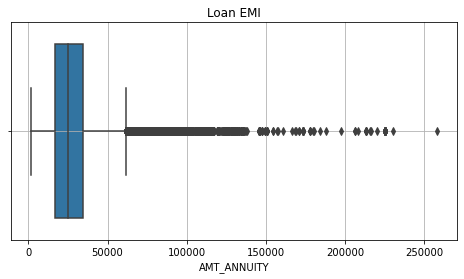

In [28]:
plt.figure(figsize=[8,4])
sns.boxplot(df['AMT_ANNUITY'])
plt.title('Loan EMI')
plt.grid()
plt.show()

In [29]:
# checking the summary statistics of the AMT_ANNUITY column
df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [30]:
df['AMT_ANNUITY'].quantile([0.25,0.5,0.75,0.95,0.99,1])

0.25     16524.0
0.50     24903.0
0.75     34596.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

- *From above box plot and summary statistics we can see that there are greater number of outliers in AMT_ANNUITY column. Hence imputing the missing values with median*

In [31]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(),inplace=True)

In [32]:
# missing value check after imputing the column with median
df['AMT_ANNUITY'].isnull().sum()

0

In [33]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### Replacing the XNA value in GENDER Column to NaN

In [34]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA',np.NaN)

In [35]:
# checking whether the XNA value is replaced with NaN
df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### Outlier Check:

- *Outlier check for any column can be done in two ways:*
    - *You can use BOX PLOT to detect outliers in the data*
    - *We can use summary statistics to check if there are outliers*
    - *If the difference between 99 quartile and max is large we can say that there are outliers in that column*
    
    
- **Approach to the treat outliers:**
 		
    - *Imputation*
    - *Deletion of outliers*
    - *Binning of values*
    - *Cap the outlier*

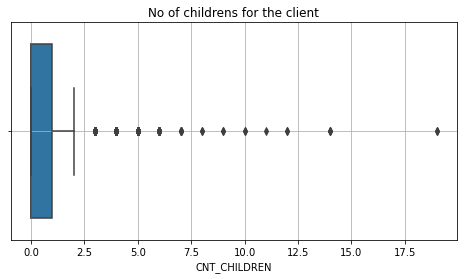

In [36]:
plt.figure(figsize=[8,4])
sns.boxplot(df['CNT_CHILDREN'])
plt.title('No of childrens for the client')
plt.grid()
plt.show()

- *From above box plot, we can see that there are outliers for the column CNT_CHILDREN*

### Binning Of Continuous Variables:

In [37]:
df['AGE'].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [38]:
df['AGE_GROUP'] = pd.cut(df['AGE'],bins=[20,30,40,50,60,70],labels=['20-30','30-40','40-50','50-60','60+'])

In [39]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,50-60


In [40]:
df['AGE_GROUP'].value_counts(normalize=True)*100

30-40    26.916110
40-50    24.554894
50-60    22.098396
20-30    15.891789
60+      10.538810
Name: AGE_GROUP, dtype: float64

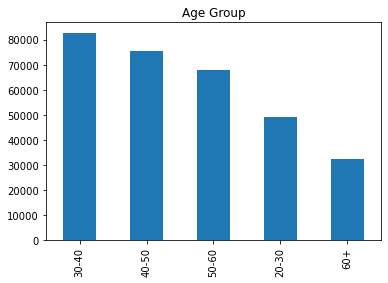

In [41]:
(df['AGE_GROUP'].value_counts().plot.bar())
plt.title('Age Group')
plt.show()

##### Observation:
- *From above bar plot we can say that most of the customers are in the age_range of 30-60 years*

### Data Imbalance Check:

In [42]:
df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

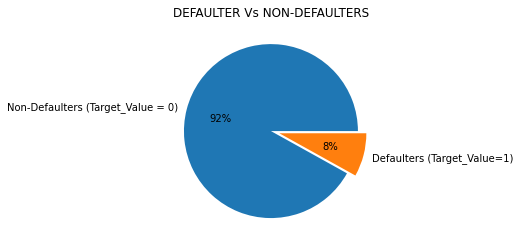

In [43]:
plt.pie(df['TARGET'].value_counts(),labels=['Non-Defaulters (Target_Value = 0)','Defaulters (Target_Value=1)'],explode=(0,0.1),autopct='%1.f%%')
plt.title('DEFAULTER Vs NON-DEFAULTERS')
plt.show()

##### Observation:

- *From above pie chart, we can say that data imbalance is high between defaulters and non-defaulters*

- *Also, we can say that 92% of the customers are paying their loans and only 8% are defaulting their loan*

##### Dividing the dataset into two different dataset one is for defaulters and the other is for Non-Defaulters:

In [44]:
df0 = df[df['TARGET'] == 0]

In [45]:
df1 = df[df['TARGET'] == 1]

##### Categorical Ordered Univariate Analysis :

In [46]:
#defining a function for countplot
def count_plot(var):
    plt.figure(figsize=[30,30])
    plt.subplot(2,2,1)
    sns.countplot(df0[var])
    plt.title('Count of Non-Defaulters',fontdict={'fontsize':30})
    plt.xlabel(var, fontdict={'fontsize': 30, 'fontweight' : 5, 'color' : 'Black'})
    plt.ylabel('Total_Count', fontdict={'fontsize': 30, 'fontweight' : 5, 'color' : 'Black'})
    plt.xticks(fontsize=30,rotation=90)
    plt.yticks(fontsize=30)


    plt.subplot(2,2,2)
    sns.countplot(df1[var])
    plt.title('Count of Defaulters',fontdict={'fontsize':30})
    plt.xlabel(var, fontdict={'fontsize': 30, 'fontweight' : 5, 'color' : 'Black'})
    plt.ylabel('Total_Count', fontdict={'fontsize': 30, 'fontweight' : 5, 'color' : 'Black'})
    plt.xticks(fontsize=30,rotation=90)
    plt.yticks(fontsize=30)
    plt.show()

##### Analysis Of CODE_GENDER Column:

In [47]:
#Non-Defaulters
df0['CODE_GENDER'].value_counts(normalize=True)*100

F    66.60417
M    33.39583
Name: CODE_GENDER, dtype: float64

In [48]:
#Defaulters
df1['CODE_GENDER'].value_counts(normalize=True)*100

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

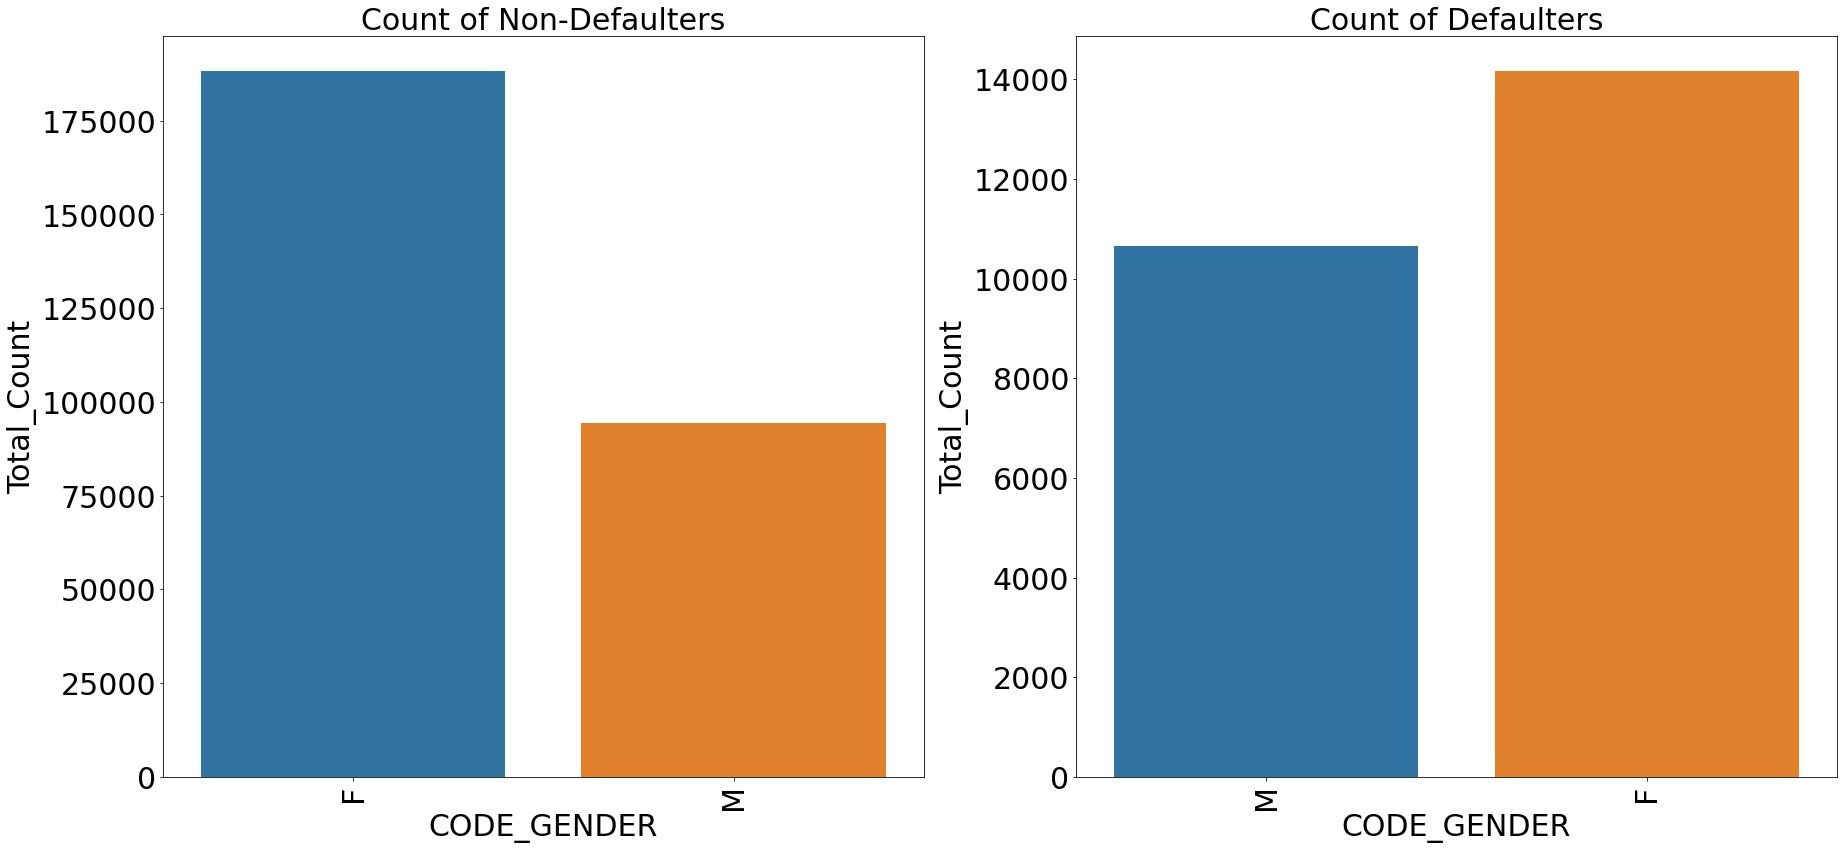

In [49]:
count_plot('CODE_GENDER')

##### Observation:
- *From the above plots we can see that there are more females are applying for the loans.*
- *Also the female defaulters are high compared to male defaulters this is because of the reason that female applicants are high*

##### Analysis Of FLAG_OWN_CAR Column:

In [50]:
#Non-Defaulters
df0['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    65.682418
Y    34.317582
Name: FLAG_OWN_CAR, dtype: float64

In [51]:
#Defaulters
df1['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64

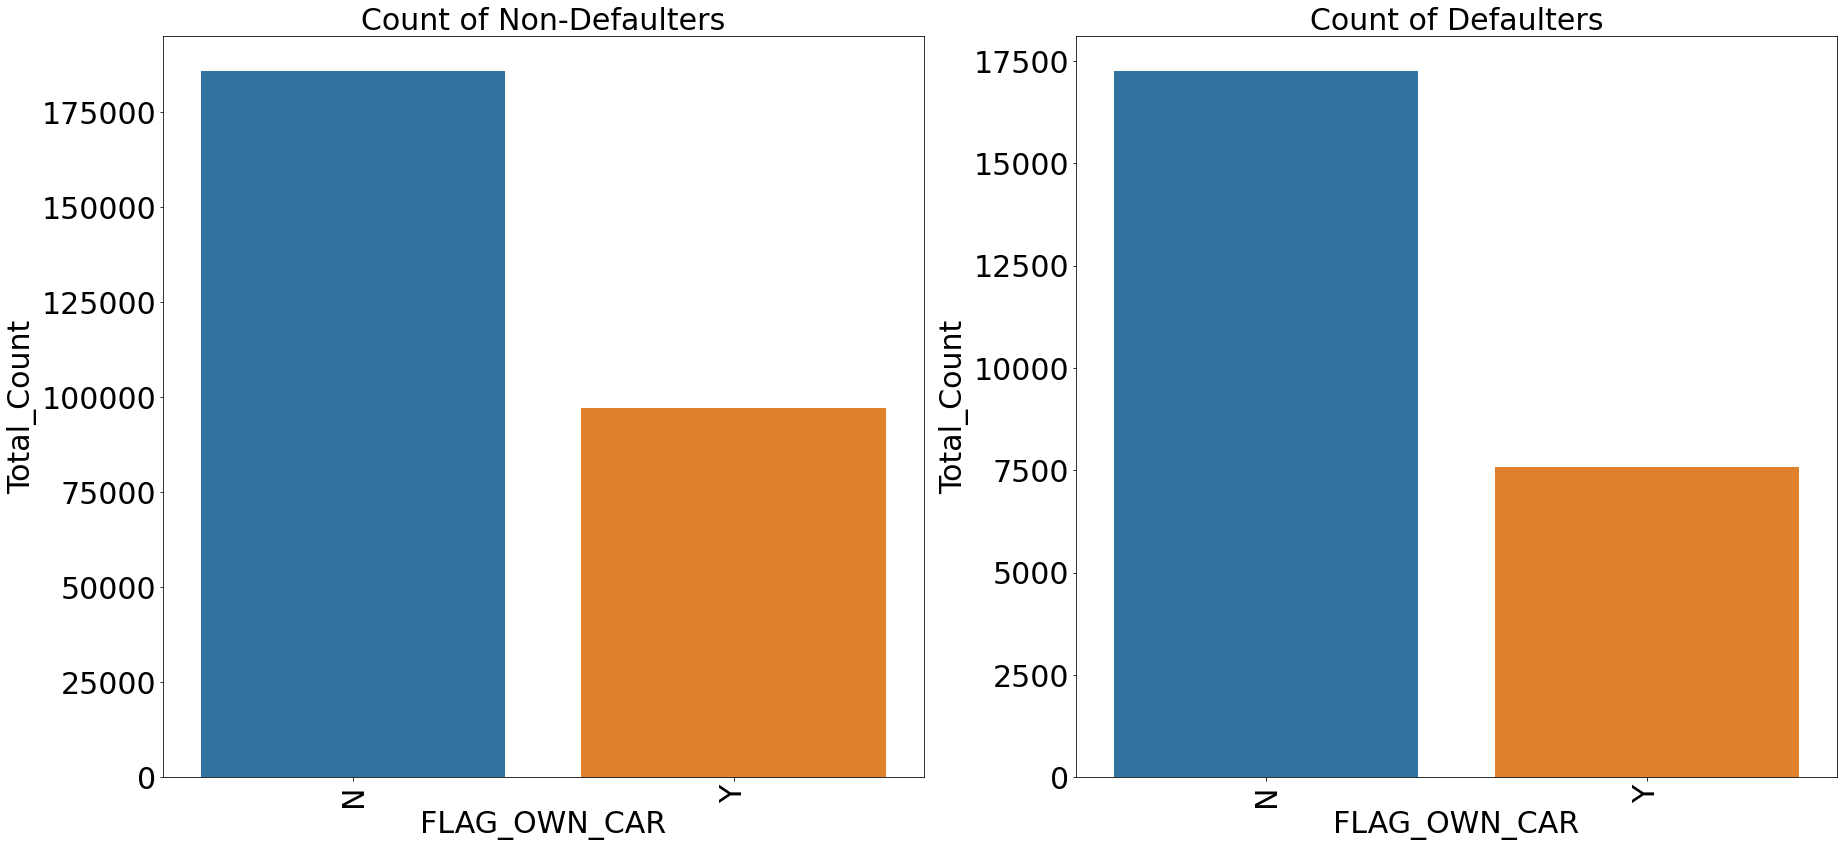

In [52]:
count_plot('FLAG_OWN_CAR')

##### Observations:
- *We can see that people who own car are less likely to default compared  to the people who doesn't own car.*

##### Analysis of NAME_EDUCATION_TYPE Column:

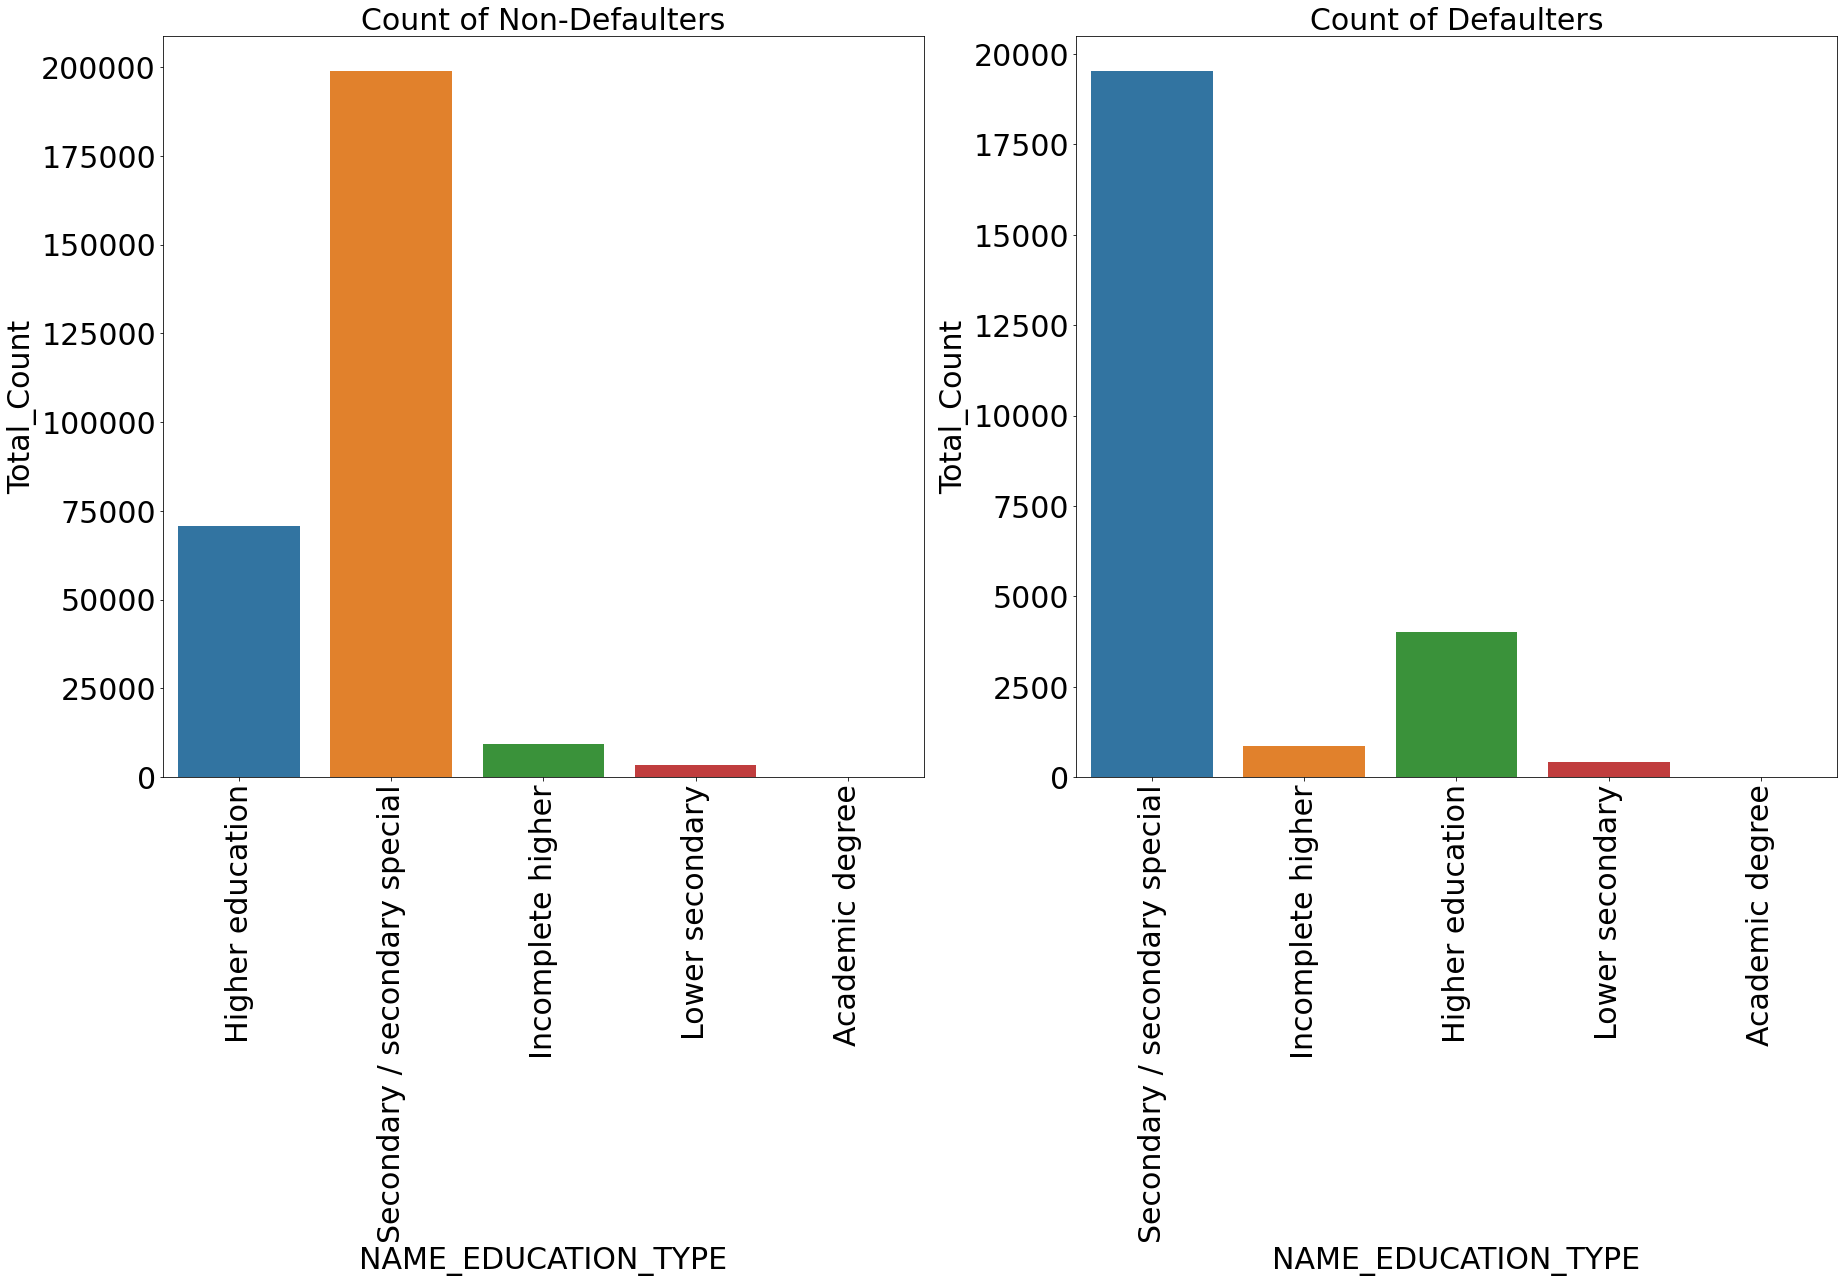

In [53]:
count_plot('NAME_EDUCATION_TYPE')

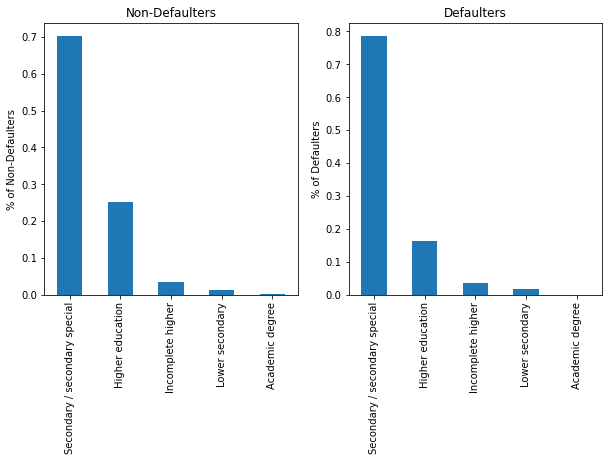

In [54]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.ylabel('% of Non-Defaulters')
df0['NAME_EDUCATION_TYPE'].value_counts(normalize=100).plot.bar()
plt.subplot(1,2,2)
plt.title('Defaulters')
plt.ylabel('% of Defaulters')
df1['NAME_EDUCATION_TYPE'].value_counts(normalize=100).plot.bar()
plt.show()

##### Observation:
- *From above we can say that the default percentage is high for people whose highest education is secondary/secondary special*

##### Analysis Of AGE_GROUP Column:

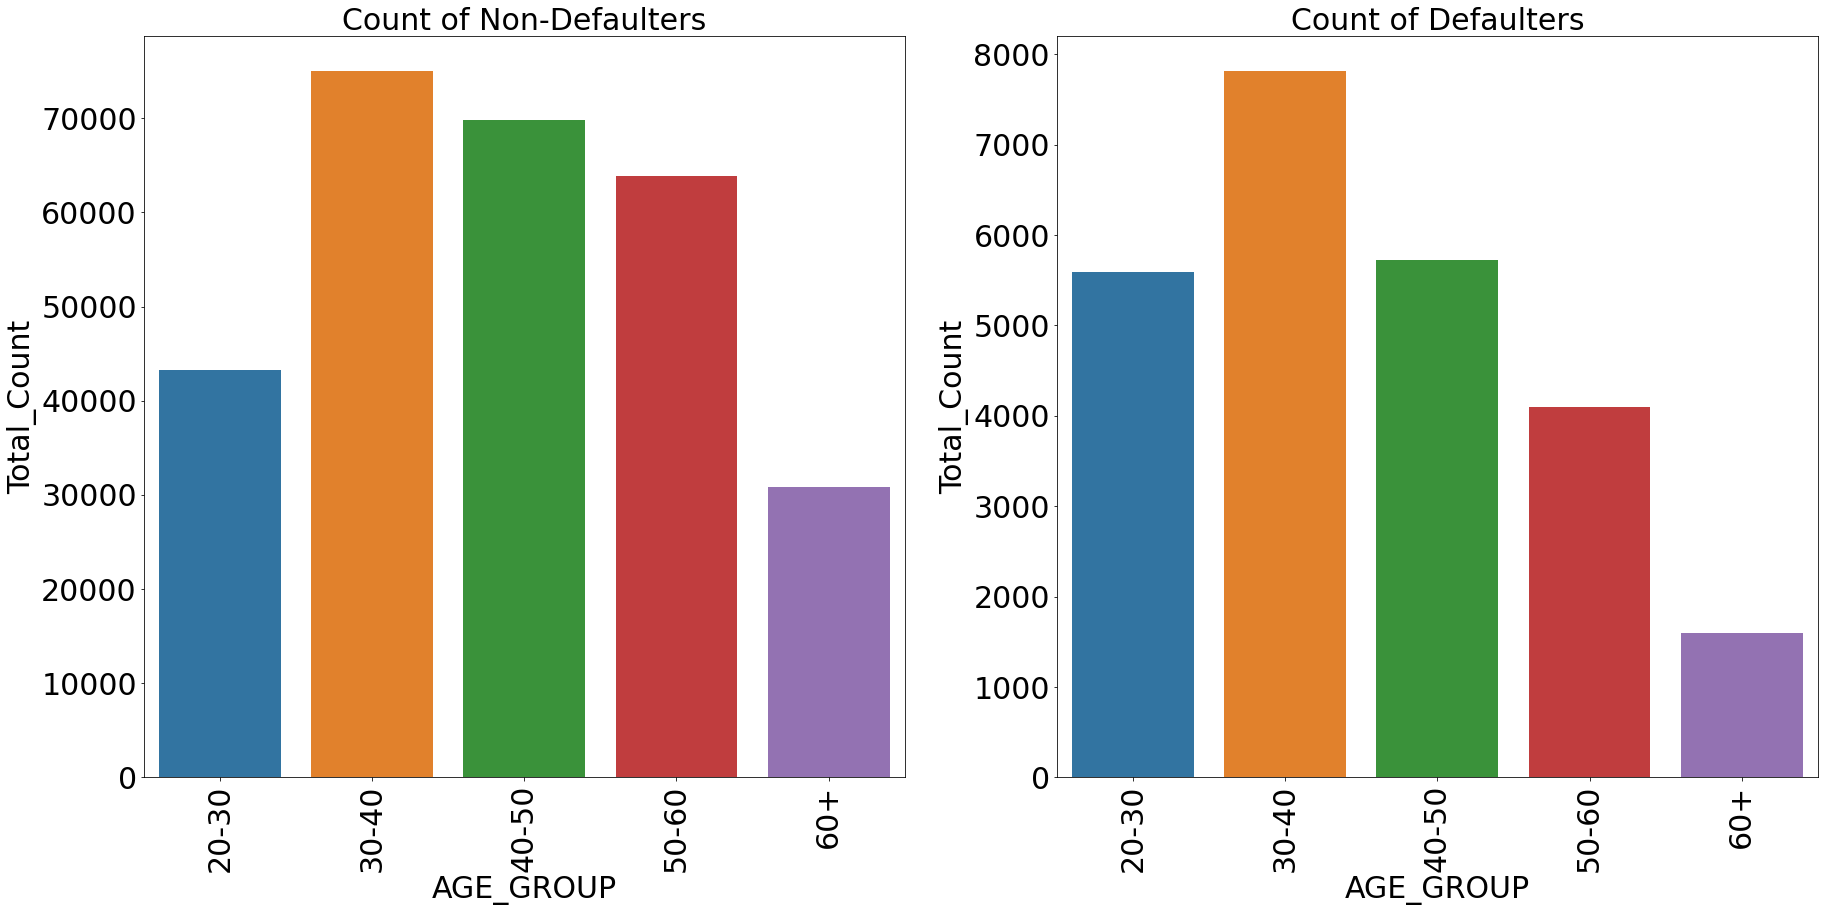

In [55]:
count_plot('AGE_GROUP')

In [56]:
df0['AGE_GROUP'].value_counts(normalize=True)*100

30-40    26.517408
40-50    24.686047
50-60    22.587960
20-30    15.308859
60+      10.899726
Name: AGE_GROUP, dtype: float64

In [57]:
df1['AGE_GROUP'].value_counts(normalize=True)*100

30-40    31.456193
40-50    23.061430
20-30    22.529708
50-60    16.523666
60+       6.429003
Name: AGE_GROUP, dtype: float64

##### Observation:
- *From above, we can say that 30-40 age group are most likely to default.*

##### Categorical Unordered Univariate Analysis:

##### Analysis Of NAME_CONTRACT_TYPE Column:

In [58]:
df['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

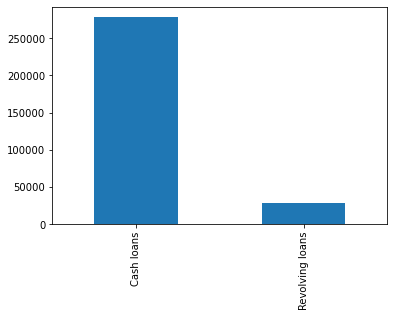

In [59]:
df['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.show()

##### Observation:
- *We can observe from above that cash loans are more compared to revolving loans*

##### Analysis Of NAME_INCOME_TYPE Column:

In [60]:
#Non-Defaulters
df0['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

In [61]:
#Defaulters
df1['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

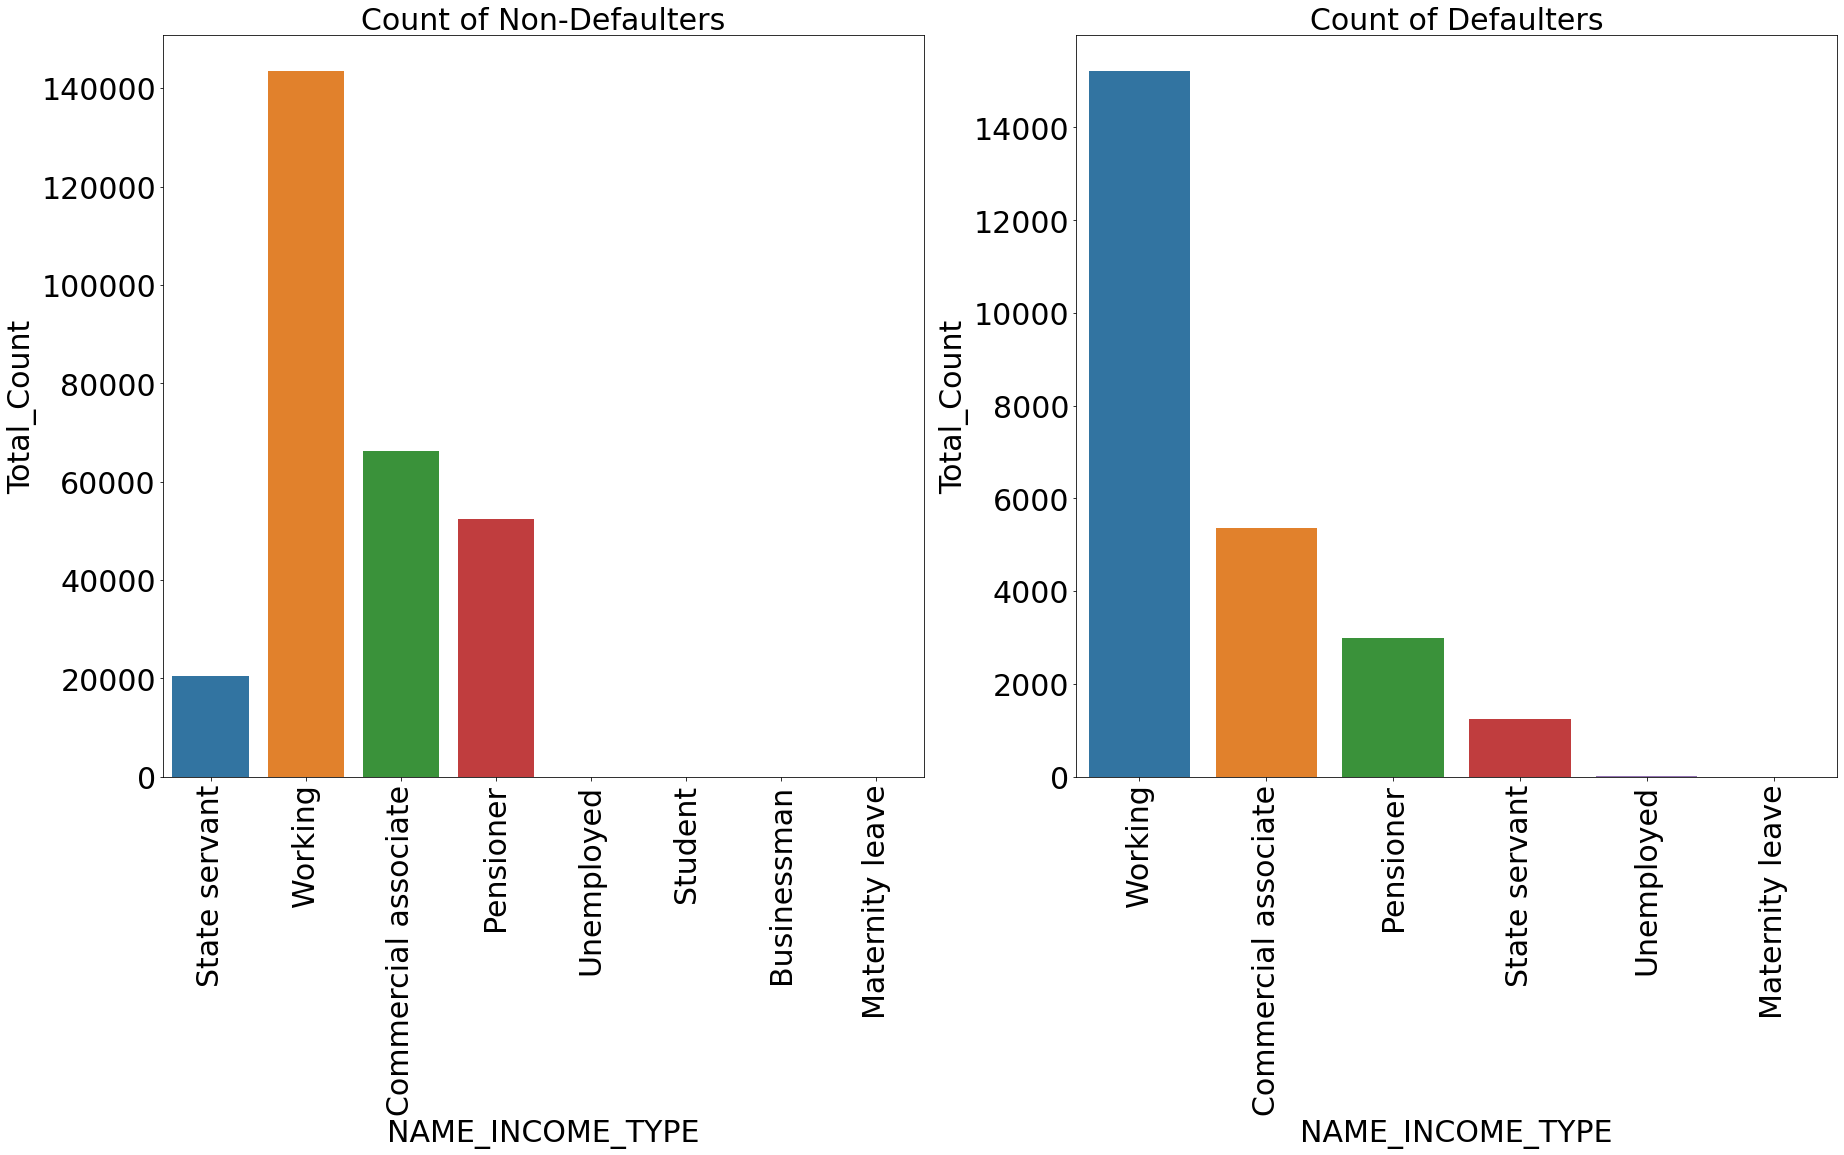

In [62]:
count_plot('NAME_INCOME_TYPE')

##### Observation:
- *We can see from above, that students never default. This could be because banks give less loans to the students*
- *Clearly we can see that bank provide more loans to working class people*
- *As a result we see that working class people are more likely default*

##### Analysis Of OCCUPATION_TYPE Column:

In [63]:
#Non-Defaulters
df0['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Unknown                  31.877419
Laborers                 17.456825
Sales staff              10.262270
Core staff                9.138054
Managers                  7.090199
Drivers                   5.835450
High skill tech staff     3.777690
Accountants               3.303666
Medicine staff            2.817614
Security staff            2.122143
Cooking staff             1.883716
Cleaning staff            1.487870
Private service staff     0.876237
Low-skill Laborers        0.613401
Secretaries               0.429098
Waiters/barmen staff      0.423084
Realty agents             0.244795
HR staff                  0.186426
IT staff                  0.174045
Name: OCCUPATION_TYPE, dtype: float64

In [64]:
#Non-Defaulters
df1['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Unknown                  25.289023
Laborers                 23.516616
Sales staff              12.455186
Drivers                   8.487412
Core staff                7.001007
Managers                  5.349446
Security staff            2.908359
High skill tech staff     2.823766
Cooking staff             2.501511
Medicine staff            2.304129
Accountants               1.909366
Cleaning staff            1.800604
Low-skill Laborers        1.446123
Private service staff     0.704935
Waiters/barmen staff      0.612286
Secretaries               0.370594
Realty agents             0.237664
HR staff                  0.145015
IT staff                  0.136959
Name: OCCUPATION_TYPE, dtype: float64

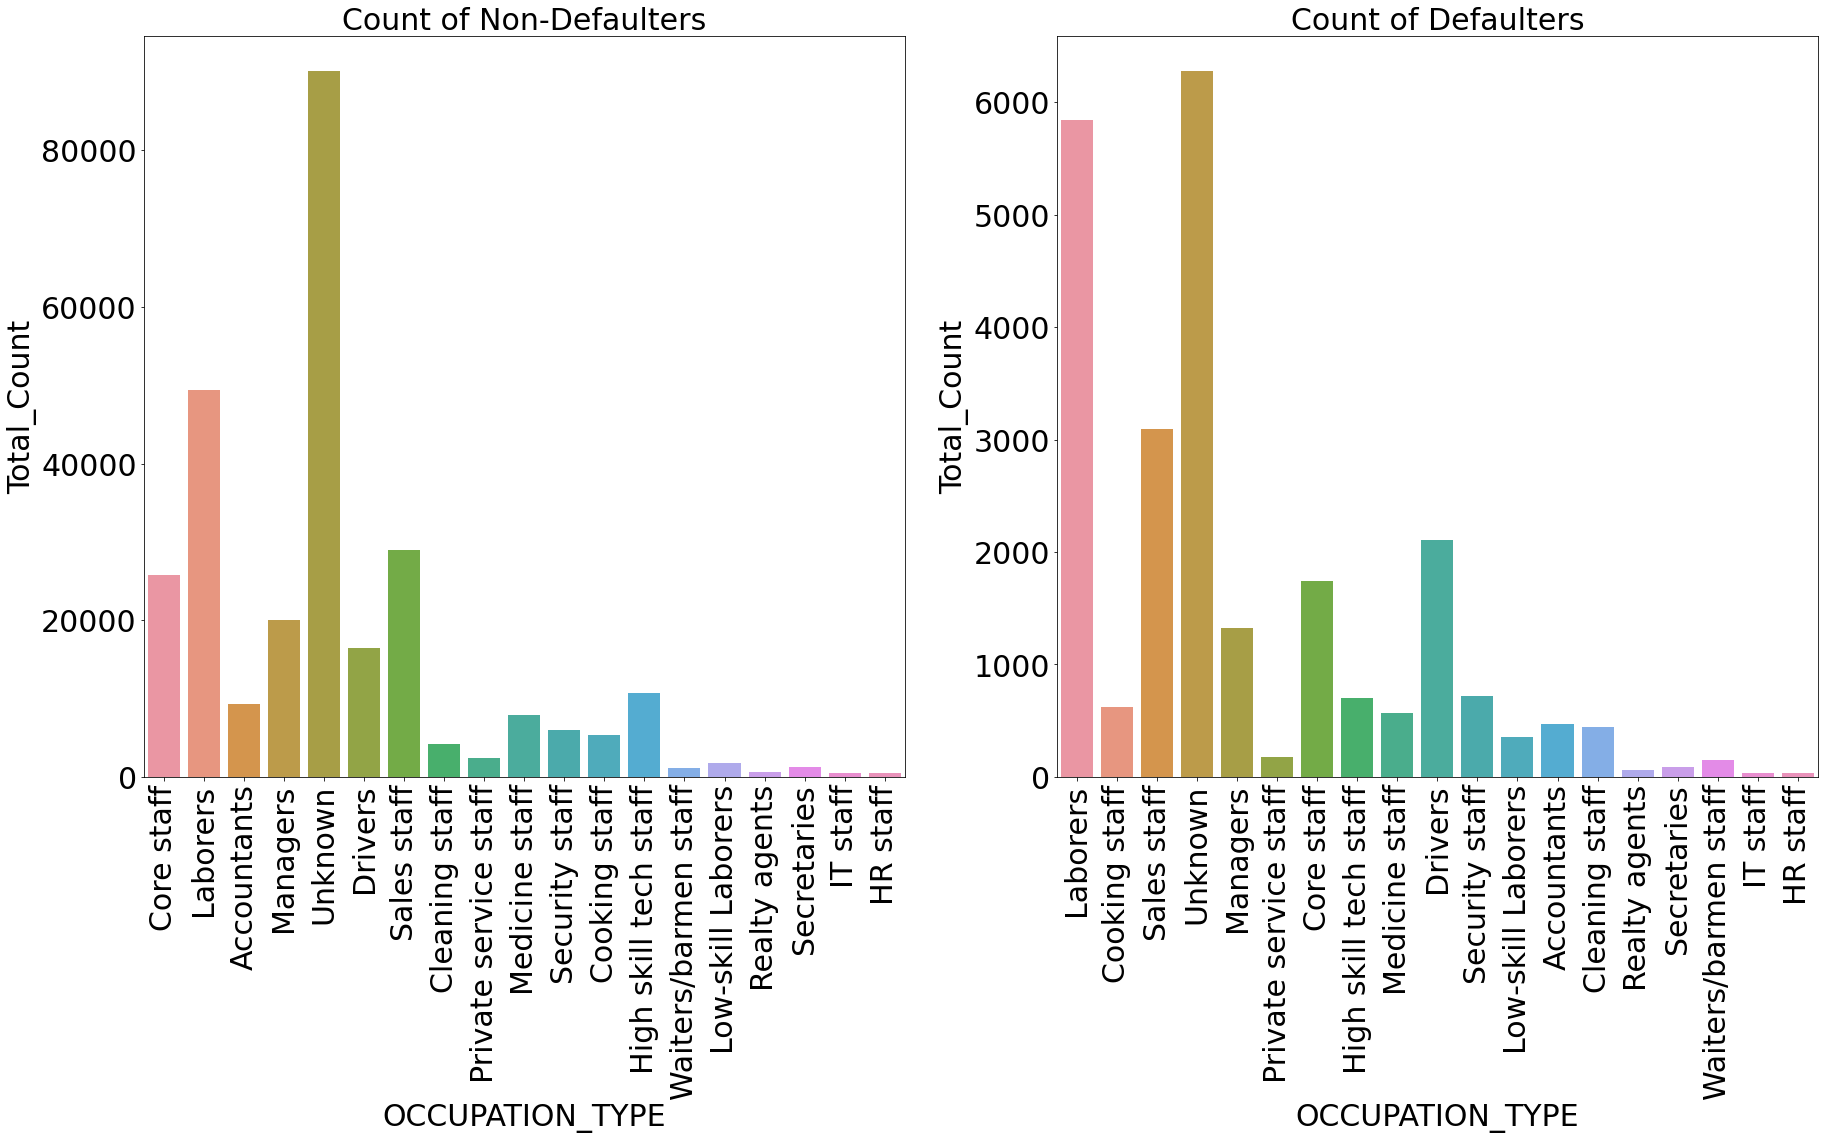

In [65]:
count_plot('OCCUPATION_TYPE')

##### Observation:
- *We can see that laborers are more likely to default followed by Sales staff and Drivers*

In [66]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [67]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [68]:
df['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [69]:
df0['ORGANIZATION_TYPE'] = df0['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [70]:
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

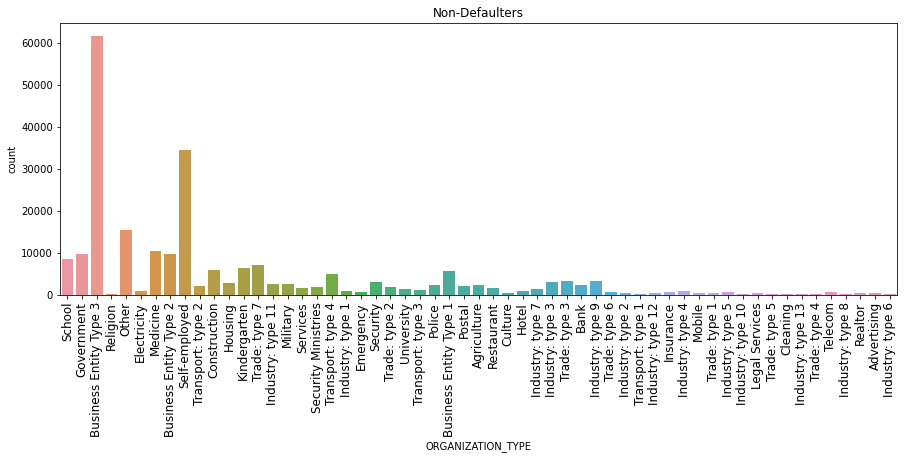

In [71]:
plt.figure(figsize=[15,5])
plt.title('Non-Defaulters')
sns.countplot(df0['ORGANIZATION_TYPE'])
plt.xticks(fontsize=12,rotation=90)
plt.show()


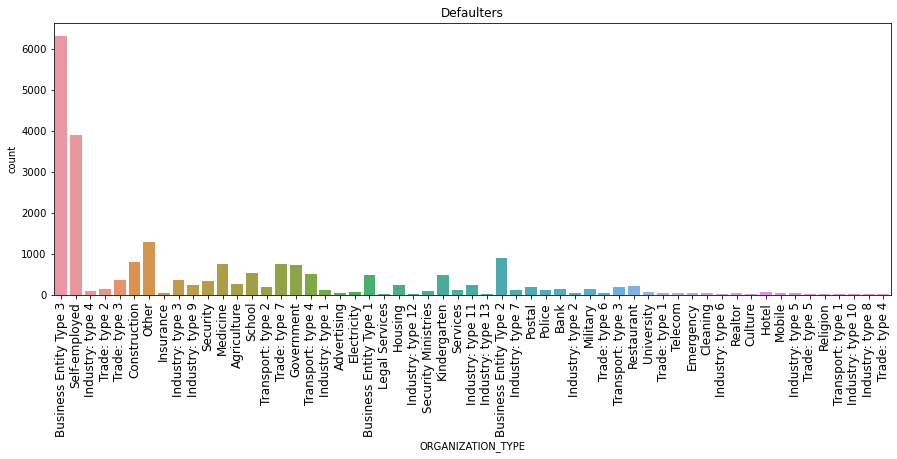

In [72]:
plt.figure(figsize=[15,5])
sns.countplot(df1['ORGANIZATION_TYPE'])
plt.title('Defaulters')
plt.xticks(fontsize=12,rotation=90)
plt.show()

##### Observation:
- *Business entity type-3 and Self employed people are more likely default the loans*

##### Numerical Univariate Analysis:

- *Target Column:  AMT_ANNUITY*
    
- *Objective:  To understand that distribution of EMI for defaulters and non-defaulters*

In [73]:
df0['AMT_ANNUITY'].describe()

count    282686.000000
mean      27163.527386
std       14658.003451
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

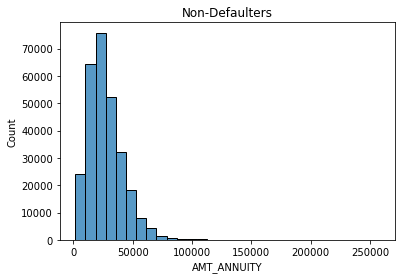

In [74]:
sns.histplot(df0['AMT_ANNUITY'],bins=30)
plt.title('Non-Defaulters')
plt.show()

##### Observation:
- *For most of the Non-defaulters, the EMI ranges from 16000-35000*

In [75]:
df1['AMT_ANNUITY'].describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

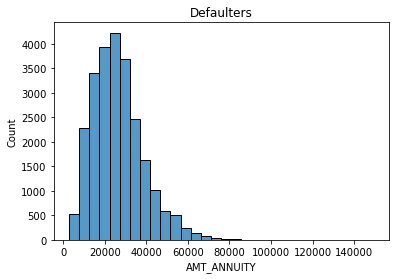

In [76]:
sns.histplot(df1['AMT_ANNUITY'],bins=30)
plt.title('Defaulters')
plt.show()

##### Observation:
- *From most of the defaulters, the EMI ranges from 17000-35000*

##### Target Column : Age

In [77]:
df0['AGE'].describe()

count    282686.000000
mean         44.216123
std          11.964511
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

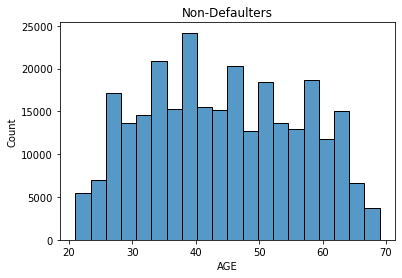

In [78]:
sns.histplot(df0['AGE'],bins=20)
plt.title('Non-Defaulters')
plt.show()

In [79]:
df1['AGE'].describe()

count    24825.000000
mean        40.778973
std         11.495961
min         21.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         69.000000
Name: AGE, dtype: float64

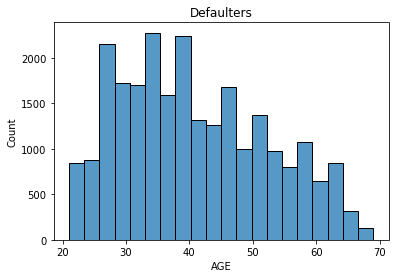

In [80]:
sns.histplot(df1['AGE'],bins=20)
plt.title('Defaulters')
plt.show()

#### Bivariate Analysis:

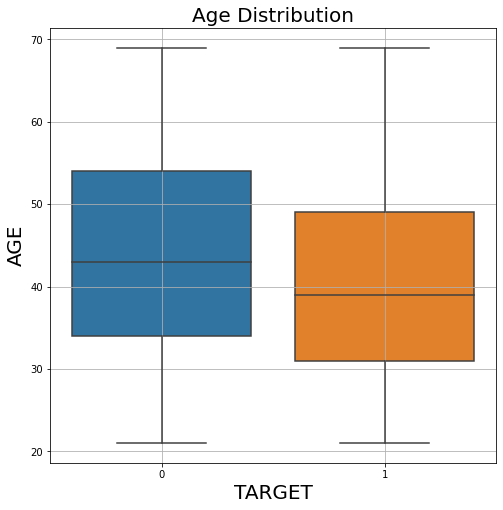

In [81]:
#checking the age distribution for defaulters and non-defaulters
plt.figure(figsize=[8,8])
sns.boxplot(df['TARGET'],df['AGE'])
plt.title('Age Distribution',fontdict={'fontsize': 20})
plt.xlabel('TARGET',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel('AGE',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.grid()
plt.show()

##### Observation:
- *From summary statistics and above graph we can conclude that, the people in the age between 30-50 are more likely to default*
- *For defaulters, the median age is around 40*
- *For non-defaulters, the median age is around 45*

In [82]:
def bivariate_nondefaulters(var1,var2):
    plt.figure(figsize=[5,6])
    plt.title('Non-Defaulters')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain')
    sns.scatterplot(df0[var1],df0[var2])
    plt.show()

In [83]:
def bivariate_defaulters(var1,var2):
    plt.figure(figsize=[5,6])
    plt.title('Defaulters')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain')
    sns.scatterplot(df1[var1],df1[var2])
    plt.show()

##### Price Of the Goods Vs Credit Amount Of the Loan:

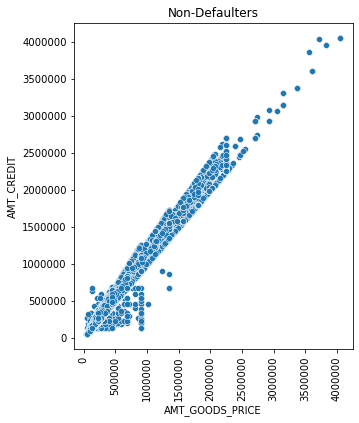

In [84]:
bivariate_nondefaulters('AMT_GOODS_PRICE','AMT_CREDIT')

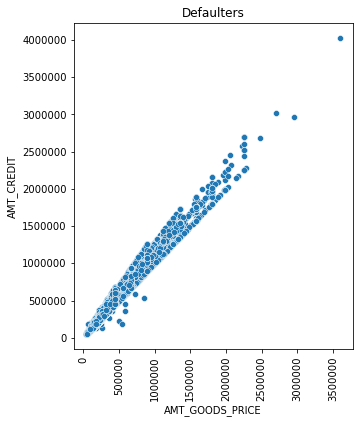

In [85]:
bivariate_defaulters('AMT_GOODS_PRICE','AMT_CREDIT')

###### Observation:
- *With increase in goods price the credit amount also increasing*

##### Credit Amount Of the Loan Vs EMI of the Loan: 

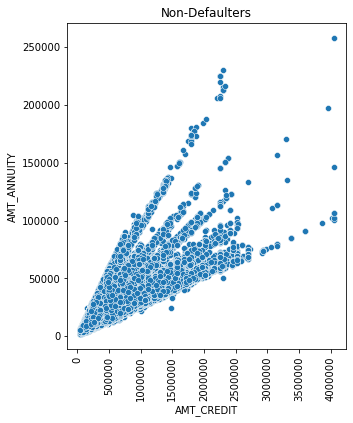

In [86]:
bivariate_nondefaulters('AMT_CREDIT','AMT_ANNUITY')

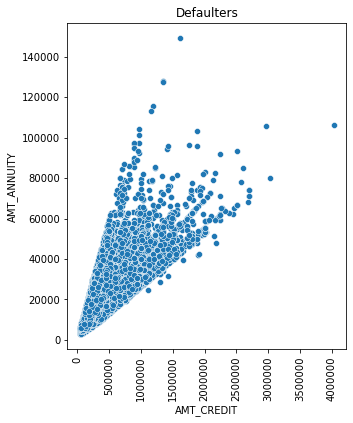

In [87]:
bivariate_defaulters('AMT_CREDIT','AMT_ANNUITY')

###### Observation:
- *With increase in credit amount the EMI is also increasing which is true as our EMI depends upon the amount of credit*

##### Occupation of the customer Vs Income of the Customer:

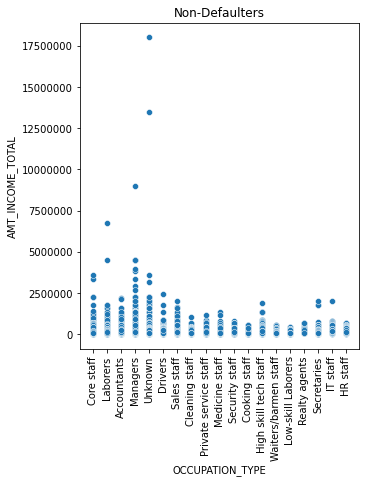

In [88]:
bivariate_nondefaulters('OCCUPATION_TYPE','AMT_INCOME_TOTAL')

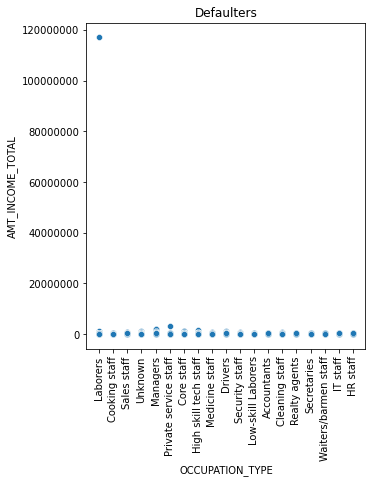

In [89]:
bivariate_defaulters('OCCUPATION_TYPE','AMT_INCOME_TOTAL')

##### Observation:
- *We can clearly see from above that the income of defaulters are very low for all occupation_types*

##### Checking correaltion between different variables:

In [90]:
#Defaulters:
defaulters = df1[['AGE','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_EMPLOYED']].corr()

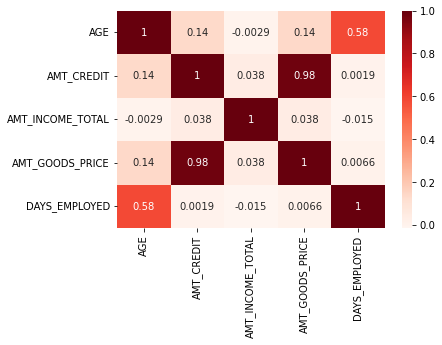

In [91]:
#correlation matrix.
sns.heatmap(defaulters,annot=True,cmap='Reds')
plt.show()

##### Observation:
- *From heatmap, we can say that price of the goods and credit amount are highly correlated*

##### Target Vs Credit Score_2

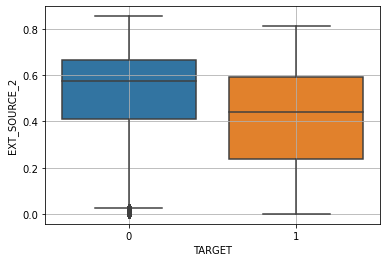

In [92]:
sns.boxplot(df['TARGET'],df['EXT_SOURCE_2'])
plt.grid()
plt.show()

##### Target Vs Credit Score_3

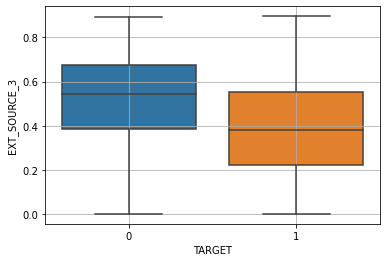

In [93]:
sns.boxplot(df['TARGET'],df['EXT_SOURCE_3'])
plt.grid()
plt.show()

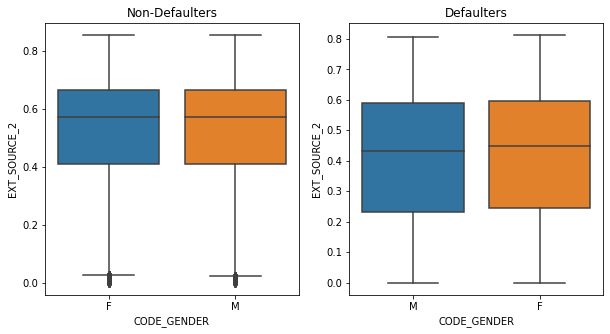

In [94]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.boxplot(df0['CODE_GENDER'],df0['EXT_SOURCE_2'])
plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(df1['CODE_GENDER'],df1['EXT_SOURCE_2'])
plt.show()

##### Observation:
- *From above we can say that, the median credit score of both male and female are low for defaulters compared to non-defaulters*

<h1 style = "color:Brown" > Previous Application Analysis <h1/>

In [95]:
prev_app = pd.read_csv('previous_application.csv')

In [96]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
prev_app.shape

(1670214, 37)

In [98]:
# missing value percentages for previous application data
((prev_app.isnull().sum()/prev_app.shape[0])*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [99]:
prev_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [100]:
#Replacing XNA values with NaN:
prev_app['NAME_CONTRACT_TYPE'] = prev_app['NAME_CONTRACT_TYPE'].replace('XNA',np.NaN)

In [101]:
prev_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

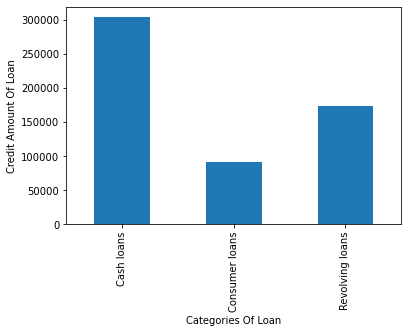

In [102]:
prev_app.groupby(by=['NAME_CONTRACT_TYPE'])['AMT_CREDIT'].mean().plot.bar()
plt.xlabel('Categories Of Loan')
plt.ylabel('Credit Amount Of Loan')
plt.show()

##### Observation:
- *From above we can say that average amount of loan is high in cash loans followed by revolving loans and consumer loans*

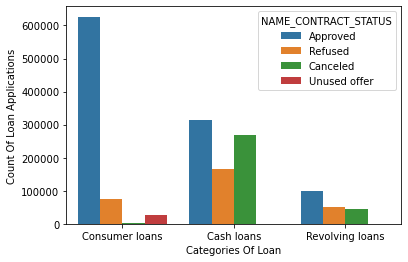

In [103]:
sns.countplot(prev_app['NAME_CONTRACT_TYPE'],hue=prev_app['NAME_CONTRACT_STATUS'])
plt.xlabel('Categories Of Loan')
plt.ylabel('Count Of Loan Applications')
plt.show()

##### Observation:
- *We can clearly see that most of the applications are for consumer loans and also the approval rate is also high*
- *We can also observe that more cash loans are refused compared to consumer and revolving loans*
